# E-commerce Supply Chain Analysis
To understand how efficiently an e-commerce business operates, we look across the full supply chain — from where products are sourced to how they reach customers. This includes data on suppliers and production, inventory levels, shipping and delivery performance, order volumes, costs, and customer behavior.
By analyzing each stage, we can find where delays, quality issues, or excess costs occur and identify opportunities to improve fulfillment speed, reduce cost, and boost customer satisfaction.

## Load and inspect data

In [2]:
import pandas as pd
data=pd.read_csv("supply_chain_data.csv")
display(data.head())

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
display(data.describe())

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
print(data.isna().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


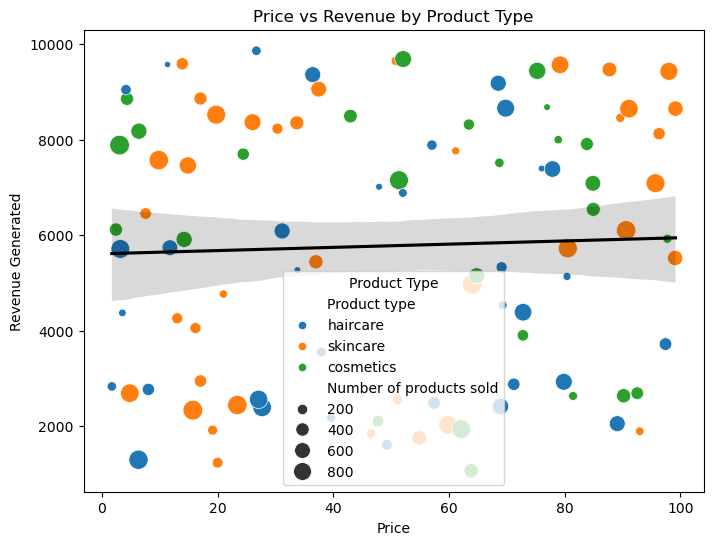

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(data=data,x='Price',y='Revenue generated',hue='Product type',size='Number of products sold',sizes=(20,200))
sns.regplot(data=data,x='Price',y='Revenue generated',scatter=False, color='black')
plt.title("Price vs Revenue by Product Type")
plt.xlabel("Price")
plt.ylabel("Revenue Generated")
plt.legend(title="Product Type")
plt.show()


Interpretation:

lookingg at this scatterplot, the first thing we see is that there is no strong correlation between the "PRICE" and "REVENUE GENERATED".
The black regression line is nearly horizontal, this suggests that changing the price does not significantly effect the revenue.

Product type comparission:
All three product types are distributed across the entire range of both price and revenue, confirming that no single product type dominates
There are high revenue points for all three product type which means all the highly successful.

Key takeway:
Pricing is Ineffective for General Revenue: Simply increasing or decreasing price across the board is unlikely to be a successful strategy for increasing revenue, as indicated by the flat trend line.
Focus on Specific Products: Success is driven by specific product-market fits rather than a general price or product type strategy. The high-revenue outliers (the points near $9,000-$10,000) are the ones to investigate.
High Price/Low Volume Model Exists: The very high-revenue points often correspond to smaller bubbles, suggesting a successful niche of high-margin, premium products across all three categories.

## Analyse Sales by Product Type

In [54]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
display(sales_data)
revenue_data = data.groupby('Product type')['Revenue generated'].sum().reset_index()
display(revenue_data)

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


,Product type,Revenue generated
0,cosmetics,161521.265999
1,haircare,174455.390605
2,skincare,241628.162133


Interpretation:

The heighest revenue resource of this company is skincare products
Hence, Skincare products generated the most revenue.

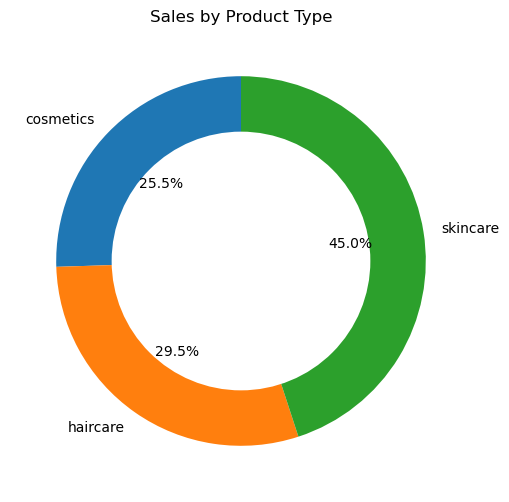

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    sales_data['Number of products sold'],
    labels=sales_data['Product type'],
    autopct='%1.1f%%',
    startangle=90
)

# make it a donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Sales by Product Type")
plt.show()

## Revenue generated by Shipping Carriers

In [45]:
total_revenue=data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


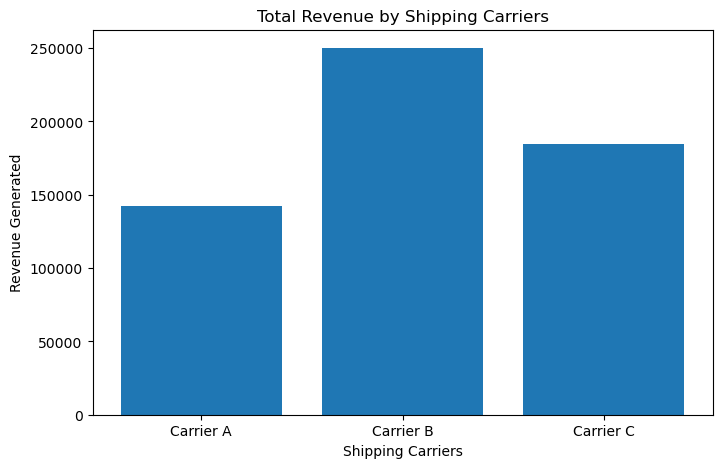

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(total_revenue['Shipping carriers'], total_revenue['Revenue generated'])
plt.xlabel("Shipping Carriers")
plt.ylabel("Revenue Generated")
plt.title("Total Revenue by Shipping Carriers")
plt.show()

## Analyze the Revenue Generated by each SKU

In [57]:
revenue_by_sku = data.groupby('SKU')['Revenue generated'].sum().reset_index()

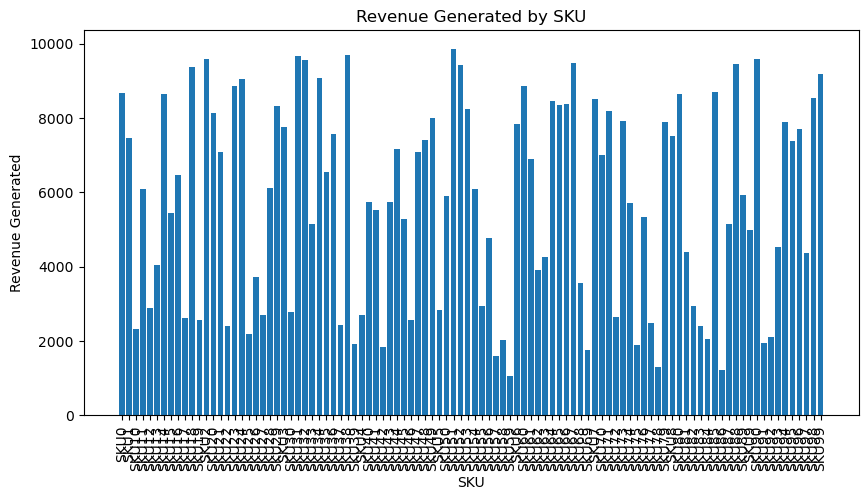

In [62]:
plt.figure(figsize=(10,5))

plt.bar(revenue_by_sku['SKU'], revenue_by_sku['Revenue generated'])
plt.title("Revenue Generated by SKU")
plt.xlabel("SKU")
plt.ylabel("Revenue Generated")
plt.xticks(rotation=90)  # rotates labels so they don't overlap
plt.show()

As it is hard to interpret the result by showing all skus
Showing the top 10 SKUs only for better understanding.

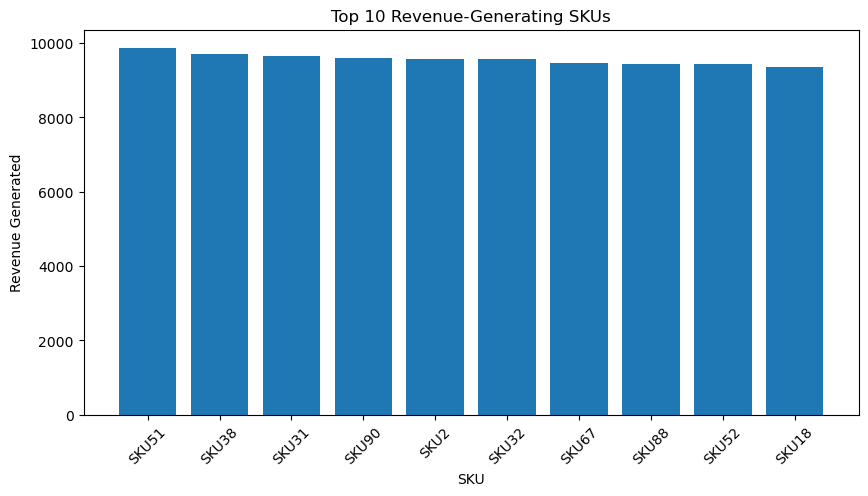

In [63]:
top_skus = revenue_by_sku.sort_values(by='Revenue generated', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_skus['SKU'], top_skus['Revenue generated'])
plt.title("Top 10 Revenue-Generating SKUs")
plt.xlabel("SKU")
plt.ylabel("Revenue Generated")
plt.xticks(rotation=45)
plt.show()


## Analyze the order Quantity of each SKU

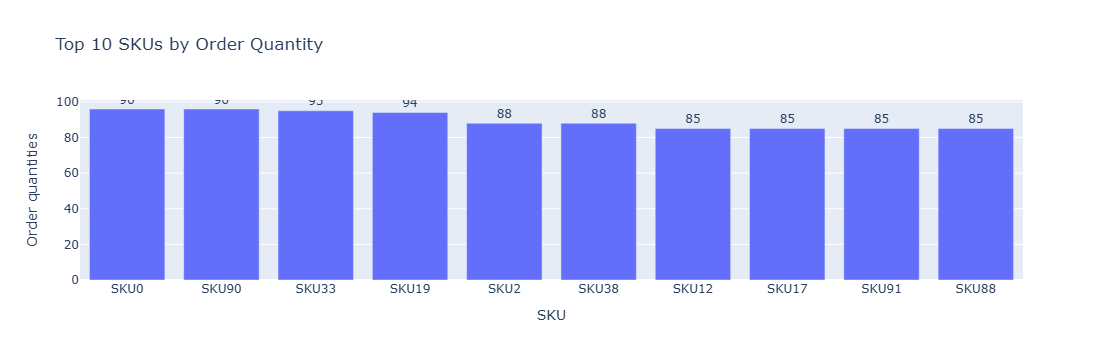

In [65]:
import plotly.express as px

top_sku = (
    data.groupby('SKU')['Order quantities']
    .sum()
    .reset_index()
    .sort_values(by='Order quantities', ascending=False)
    .head(10)
)

order_quantity_chart = px.bar(
    top_sku,
    x='SKU',
    y='Order quantities',
    title='Top 10 SKUs by Order Quantity',
    text='Order quantities'
)
order_quantity_chart.update_traces(textposition='outside')
order_quantity_chart.show()

In [66]:
## Analyze the Shipping cost of Carriers

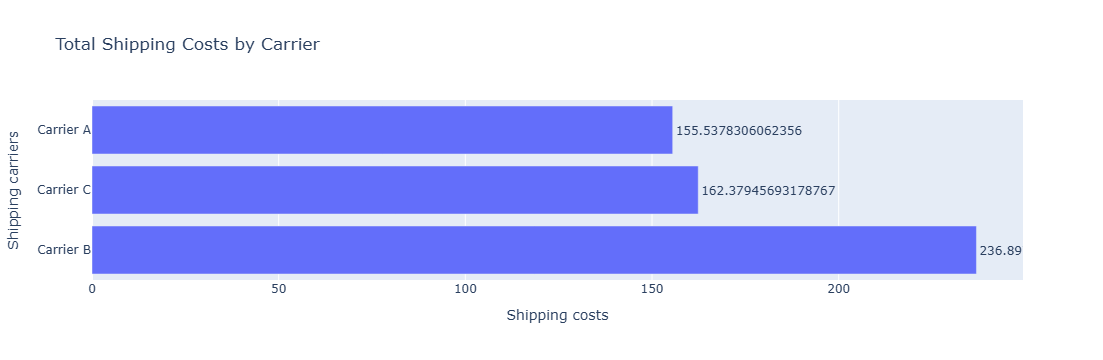

In [70]:
px.bar(
    shipping_costs,
    x='Shipping costs',
    y='Shipping carriers',
    orientation='h',
    title='Total Shipping Costs by Carrier',
    text='Shipping costs'
).update_traces(textposition='outside').show()


This chart shows how much total shipping cost is associated with each carrier. Higher cost may indicate higher shipment volume or higher pricing structure. This helps identify the most expensive carriers and potential areas to optimize logistics spend.

## To Find the Cost Distribution by Transportation mode

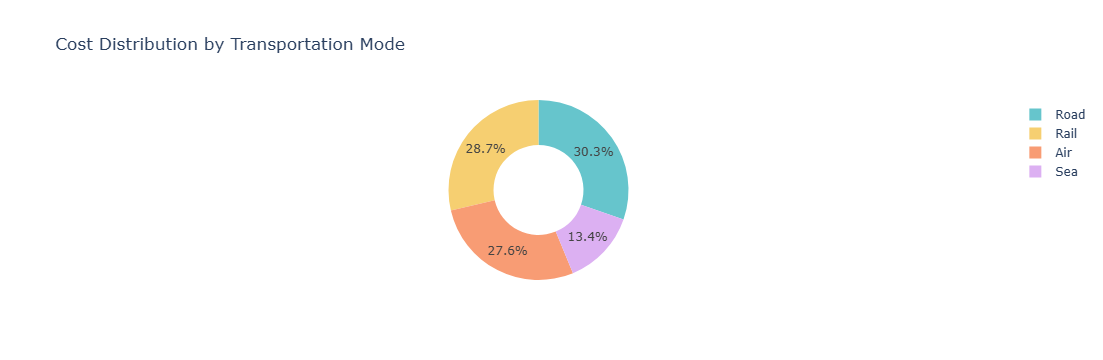

In [73]:
transport_cost = (
    data.groupby('Transportation modes')['Costs']
    .sum()
    .reset_index()
)

transportation_chart = px.pie(
    transport_cost,
    values='Costs',
    names='Transportation modes',
    
    title='Cost Distribution by Transportation Mode',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

transportation_chart.show()

This chart shows how total logistics costs are distributed across different transportation modes. It highlights which mode is the most expensive and where optimization efforts can be focused.

## Analyze Defect Rate of the product

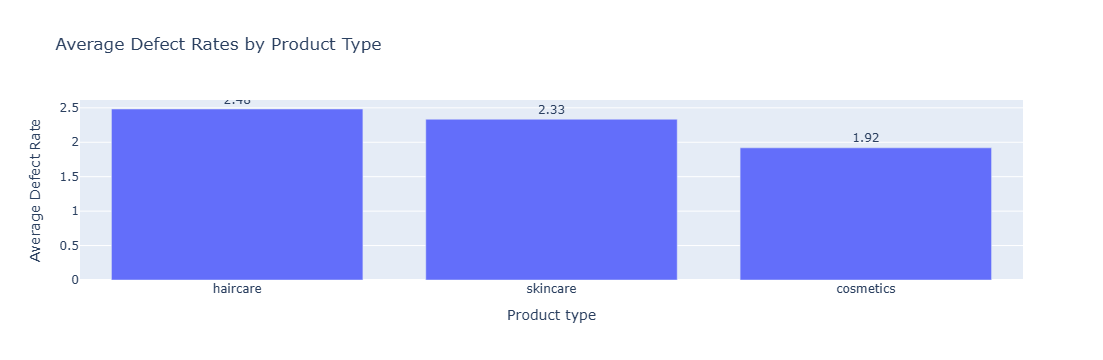

In [75]:
# Calculate average defect rate by product type
defect_rates_by_product = (
    data.groupby('Product type')['Defect rates']
    .mean()
    .reset_index()
    .sort_values(by='Defect rates', ascending=False)
)

# Plot bar chart
fig = px.bar(
    defect_rates_by_product,
    x='Product type',
    y='Defect rates',
    title='Average Defect Rates by Product Type',
    text='Defect rates'  # show values on bars (optional)
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_title='Average Defect Rate')

fig.show()

Both haircare and skincare have defect rates above $2.3\%$, suggesting that immediate quality control and manufacturing process improvements should be focused on these two product lines.

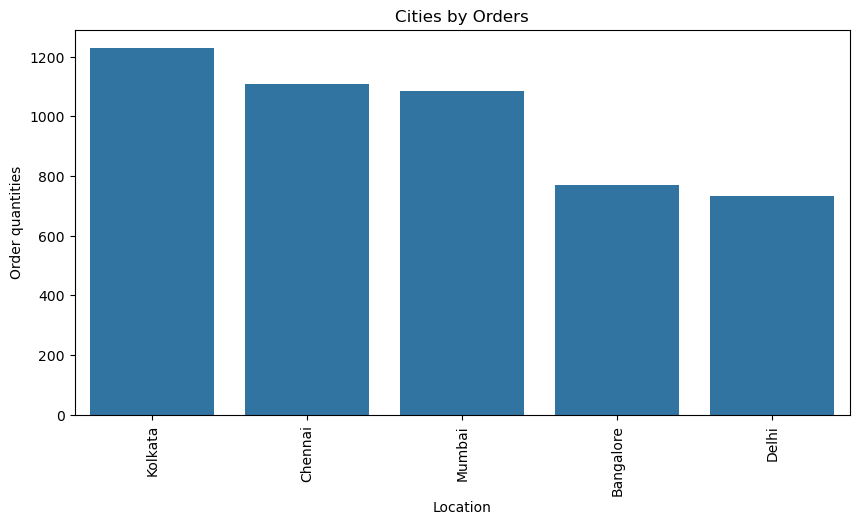

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

order_city = (
    data.groupby('Location')['Order quantities']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=order_city, x='Location', y='Order quantities')
plt.title("Cities by Orders")
plt.xticks(rotation=90)
plt.show()


Kolkata shows the highest order volume, indicating a strong customer base and consistent demand. This region should remain a priority for inventory allocation and fulfillment capacity.

Chennai ranks second, reflecting solid demand growth potential in South India. Maintaining stock availability and optimizing delivery routes here can support continued sales momentum.

Mumbai and Bangalore follow, representing major metro markets with steady volume. These cities already have established logistics networks — focusing on delivery efficiency and customer experience can unlock additional value.